In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
np.random.seed(7)

## Step 1 — Simulate raw log data
A typical request log may include:

- `timestamp` (when the request happened)
- `endpoint` (route like `/api/login`)
- `method` (GET/POST)
- `status` (HTTP status code)
- `latency_ms` (response time)
- `bytes` (response size)
- `user_id` (anonymized)
- `region` (client region)
- `cache_hit` (whether cached)

We will intentionally add **messy values** (missing fields, wrong types, outliers) to make the processing realistic.





In [ ]:
#do step 1 here
def simulate_logs(hours=24,house_count=10000):
    n = hours*60
    time_stamps = []
    for i in range(n):
        time_stamps.append(i+1)
    #city has 60 car chargers each ranges from 0-350 for whole hour
    mu = 3.7876811131611228
    sigma = 0.8899150743790847
    public_car_chargers = np.random.lognormal(mean=mu, sigma=sigma, size=n)
    residential_house = np.random.randint((house_count*5)/(24*60), (house_count*40)/(24*60), size=n)
    print()
    df = pd.DataFrame({
        "TimeStamp":time_stamps,
        "public_car_chargers": public_car_chargers,
        "residential_house": residential_house,
    })
    return df
df = simulate_logs()
print(df)


      TimeStamp  public_car_chargers  residential_house
0             1            39.885376                 22
1             2            11.288624                 12
2             3             5.427570                 20
3             4            19.680088                 10
4             5            39.273422                 15
...         ...                  ...                ...
1435       1436            29.674928                 14
1436       1437            19.219597                 13
1437       1438            86.685843                 21
1438       1439            39.955636                 21
1439       1440            58.514227                  4

[1440 rows x 3 columns]


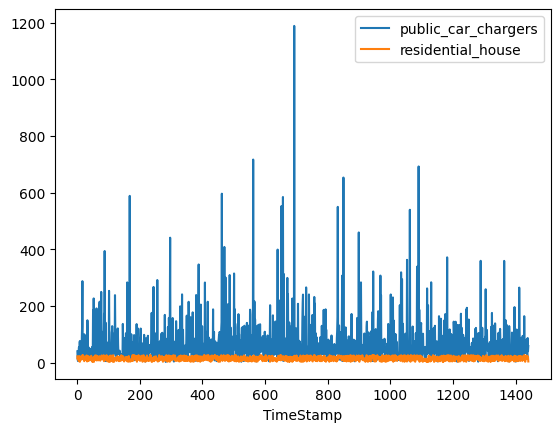

In [8]:
import matplotlib.pyplot as plt

x = df["TimeStamp"]

for col in df.columns:
    if col != "TimeStamp":
        plt.plot(x, df[col], label=col)

plt.xlabel("TimeStamp")
plt.legend()
plt.show()

## Step 2 — Basic DataFrame understanding
Key first steps:

1) `info()` (dtypes + missing values)
2) `describe()` for numeric columns
3) check for duplicates and missingness

raw.info()
raw.describe(include='all').T
# Missing values per column
raw.isna().sum().sort_values(ascending=False)


In [ ]:
#do step 2 here

## Step 3 — Cleaning and type fixes
Common issues we will fix:

- `timestamp` should be datetime
- `bytes` contains strings like `'12,345'`
- negative latency values
- missing endpoints

We'll produce a clean DataFrame called `df`.


In [ ]:
#do step 3 here

## Step 4 — Handling outliers (realistic)
Response time often has a long tail. We typically **cap** extreme values or remove them depending on context.

Here we will cap at the 99th percentile (winsorize) so plots are readable, but we keep the rows.

p99 = df["latency_ms"].quantile(0.99)
df["latency_ms_capped"] = df["latency_ms"].clip(upper=p99)

p99



In [ ]:
#do step 4 here

## Step 5 — Feature engineering
Feature engineering = creating useful columns for analysis.

We'll create:

- `minute` (timestamp floored to minute) for time aggregation
- `hour`
- `endpoint_group` (collapse `/api/items/123` into `/api/items/{id}`)
- `is_error`
- `latency_bucket` (fast/ok/slow)


In [ ]:
#do step 5 here

## Step 6 — Aggregations (the core of processing)
### A) Traffic over time
Requests per minute + error rate per minute.

In [ ]:
#do step 6 here

## Step 7 — A simple 'anomaly' idea (optional)
If time allows: flag minutes where traffic is unusually high.

We'll compute a rolling mean and find points above mean + 2*std.


In [ ]:
#do step 7 here

## Summary of what we did
- simulated messy, realistic CS log data
- loaded into a DataFrame
- inspected data types and missingness
- cleaned and fixed types
- capped outliers for readability
- engineered features for analysis
- aggregated (groupby) and visualized trends

This is the *standard data processing pipeline* you can reuse on many datasets.